In [27]:
#!pip install psycopg2


In [28]:
import psycopg2
import pandas as pd
import csv

### verify the conexion
try:
    # Connect to the database
    conn = psycopg2.connect(
        host="pg.ujueta.com",
        port="5432",
        user="consultoria",
        password="LmKTXJBXya!14]f9!2k]",
        database="postgres",
    )
except psycopg2.Error as e:
    print("Error connecting to the database:")
    print(e)
else:
    print("Connection established successfully")

Connection established successfully


In [29]:

### ventas diario apiladas
def export_forecast_to_csv():
    try:
        # connect to the database
        conn = psycopg2.connect(
            host="pg.ujueta.com",
            port="5432",
            user="consultoria",
            password="LmKTXJBXya!14]f9!2k]",
            database="postgres",
        )

        # create cursor
        with conn.cursor() as cur:

            # ececute a sql query

            cur.execute("SELECT * FROM forecast.ventas_diario")

            # fetch the results
            results = cur.fetchall()

            # open a file in the downloads folder

            with open(
                r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\outputs.csv",
                #"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/outputs.csv",
                "w",
                newline="",
            ) as f:
                # create a csv writer
                writer = csv.writer(f)

                # write the column names
                writer.writerow([col[0] for col in cur.description])

                # write the query results
                writer.writerows(results)
    except Exception as e:
        print(f"An error ocurred: {e}")
    finally:
        # close the cursor and connection
        if conn:
            conn.close()


# Call the function to export data to csv
export_forecast_to_csv()


In [1]:


### manipulate data

import pandas as pd

# carga de datas
data = pd.read_csv(
    #r"C:\Users\Alberto Florez\OneDrive\Documentos\GitHub\outputs.csv"
    r"/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/outputs.csv"
)
# convertir en dataframe
df = pd.DataFrame(data)
df.head()

,docdate,codigo_articulo,cantidad
0,2022-01-03,AUACALR4,1
1,2022-01-03,AUACCH1,5
2,2022-01-03,AUACPB400,1
3,2022-01-03,AUACRIM4F,5
4,2022-01-03,AUACSH1000,3


In [2]:
df.shape

(87675, 3)

In [5]:
import pandas as pd

def sumarizar_a_mensual(df, fecha_col, suma_col, agrupar_por=None):
    """
    Función para sumarizar datos diarios a un nivel mensual.

    Parámetros:
    ----------
    df : pd.DataFrame
        El DataFrame de entrada con los datos a procesar.
    fecha_col : str
        Nombre de la columna que contiene las fechas.
    suma_col : str
        Nombre de la columna cuyos valores se desean sumarizar.
    agrupar_por : list, optional
        Lista de columnas adicionales para agrupar (por defecto es None).
    
    Retorna:
    -------
    pd.DataFrame
        DataFrame con los datos agregados a nivel mensual.
    """
    # Asegurar que la columna de fecha esté en formato datetime
    df[fecha_col] = pd.to_datetime(df[fecha_col], errors='coerce')
    
    # Filtrar filas con fechas válidas
    df = df.dropna(subset=[fecha_col])
    
    # Crear la clave de agrupación mensual
    df['mes_inicio'] = df[fecha_col].dt.to_period('M').dt.to_timestamp()

    # Configurar las columnas para agrupar
    group_cols = ['mes_inicio'] + (agrupar_por if agrupar_por else [])

    # Realizar la agrupación y sumarización
    resultado = (
        df.groupby(group_cols, as_index=False)[suma_col]
        .sum()
    )

    return resultado


In [6]:
# Usar la función
df = sumarizar_a_mensual(
    df, 
    fecha_col='docdate', 
    suma_col='cantidad', 
    agrupar_por=['codigo_articulo']
)

print(df)

     mes_inicio codigo_articulo  cantidad
0    2022-01-01         AUAC265         1
1    2022-01-01       AUAC3-4-1        70
2    2022-01-01      AUACAC24NE         2
3    2022-01-01        AUACAE15         1
4    2022-01-01        AUACAE20       138
...         ...             ...       ...
9774 2024-11-01    SOSWSWW2060N        20
9775 2024-11-01     SOSWSWW2550         2
9776 2024-11-01     SOSWSWW2760         2
9777 2024-11-01      SOSWT1-111         7
9778 2024-11-01      SOSWT1-115         0

[9779 rows x 3 columns]


In [33]:
# List of SKUs to filter
selected_skus = [
                    'AUACALM4','AUACALS4','AUACBD850','AUACEG250','AUACSC901','AUELCR433','AUELMC5','HEELAG114',
                     'HEELAG1165','HEELAIRKIT5','HEELCA1024S','HEELCA6205','HEELCHS16','HEELEB7056','HEELEB90758','HEELEP181',
                     'HEELHG1600','HEELID600','HEELPS250','HEELPS350','HEELPW1565','HEELPW2275','HEELRM9026','HEELSP500',
                     'HEELVC0115P','HEELVC0640P','HEELVC2525P','HEELXAG20','HEFUFC25','HEFUFCD10','HEFUFHG18','SOELCSVM510',
                     'SOELCSVM760','SOELPES6300','SOELPMS6505','SOELSI7130MP','SOELSI7150DV','SOELSI7160XP','SOELSI7200XP',
                     'SOELSI8180MP','SOELSI9180DV','SOELSI9220DV','SOFUFW125','SOFUFW161M','SOSWC1-611','SOSWC1-651',
                     'SOSWC1-811','SOSWG2-210','SOSWG2-214','SOSWM1-111','SOSWM3-215','SOSWM3-315','SOSWM3-317','SOSWP2-511',
                      'SOSWP2-513','SOSWP2-514','SOSWP2-516','SOSWSWA153N'
]

# Filter the dataset
filtered_df = df[df['codigo_articulo'].isin(selected_skus)]

In [48]:
print("Número de SKUs :", len(selected_skus))

Número de SKUs : 58


In [34]:
print(filtered_df)

         docdate codigo_articulo  cantidad
6     2022-01-03       AUELCR433         5
8     2022-01-03         AUELMC5         3
9     2022-01-03       HEELAG114        14
11    2022-01-03      HEELAG1165         0
17    2022-01-03      HEELEB7056         5
...          ...             ...       ...
89275 2024-12-02      SOSWG2-214        22
89280 2024-12-02      SOSWM3-215        10
89281 2024-12-02      SOSWM3-315        40
89288 2024-12-02      SOSWP2-511        20
89290 2024-12-02     SOSWSWA153N         2

[28812 rows x 3 columns]


In [35]:
data_mediumdda = filtered_df[filtered_df['docdate'] >= '2022-01-01']
data_mediumdda

,docdate,codigo_articulo,cantidad
6,2022-01-03,AUELCR433,5
8,2022-01-03,AUELMC5,3
9,2022-01-03,HEELAG114,14
11,2022-01-03,HEELAG1165,0
17,2022-01-03,HEELEB7056,5
...,...,...,...
89275,2024-12-02,SOSWG2-214,22
89280,2024-12-02,SOSWM3-215,10
89281,2024-12-02,SOSWM3-315,40
89288,2024-12-02,SOSWP2-511,20


In [36]:
#========================================================================================================================================
# Ajuste de Datos para statsforecast
#========================================================================================================================================

#-- Dato de ejemplo para función

def data_sf(df, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo'):
    df_m = df[[date, y, unique_id]]
    df_m.rename(columns={date : 'ds', y :'y', unique_id: 'unique_id'}, inplace=True)
  
    return df_m

df_m = data_sf(data_mediumdda, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo')
df_m
df_m.info()




<class 'pandas.core.frame.DataFrame'>
Index: 28812 entries, 6 to 89290
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         28812 non-null  datetime64[ns]
 1   y          28812 non-null  int64         
 2   unique_id  28812 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 900.4+ KB


In [37]:
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
from statsforecast import StatsForecast #- Para instanciar los  modelos
from statsforecast.models import Naive

from statsforecast.models import (
    AutoARIMA,
    AutoETS,
    HoltWinters,
    ADIDA,
    CrostonClassic as Croston, 
    IMAPA,
    TSB,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    Naive,
    SeasonalNaive,
    Theta,
    WindowAverage,
    Holt,
    CrostonOptimized,
)

#-- Parametros

# Número de días en el futuro a pronosticar
horizon = 12
# Ventana estacional: es 7 porque tenemos datos diarios
season_length = 12
# El número de dias que el modelo usará para hacer el forecast 
window_size = 12

# Lista de modelos a evaluar
models = [
    AutoARIMA(season_length=season_length),
    AutoETS(season_length=season_length),
    HoltWinters(season_length=season_length),
    # ADIDA(),
    # Croston(),
    # IMAPA(),
    # TSB(alpha_d = 0.2, alpha_p = 0.2),
    # HistoricAverage(),
    # DOT(season_length=season_length),
    # Naive(),
    SeasonalNaive(season_length=season_length),
    Theta(),
    # WindowAverage(window_size=12),  # Adjust `window_size` as needed
    Holt() #,
    # CrostonOptimized()
]

In [38]:
# StatsForecast.plot(df_m)

# Instanciando StatsForecast como sf
sf = StatsForecast( 
    models=models,
    freq='MS', #MS
    n_jobs=-1,
)


In [39]:
# Cross Validation
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape

crossvaldation_df = sf.cross_validation(
    df=df_m,
    h=horizon,
    step_size=horizon,
    n_windows=3
)



C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [40]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y'], errors='ignore').columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_df.reset_index(drop=False), smape)
evaluation_df.head(22)

,AutoARIMA,AutoETS,HoltWinters,SeasonalNaive,Theta,Holt,best_model
unique_id,,,,,,,
AUACALM4,0.523121,0.569608,0.543628,0.546492,0.523921,0.559124,AutoARIMA
AUACALS4,0.528790,0.467448,0.485878,0.501974,0.519217,0.485319,AutoETS
AUACBD850,0.758986,0.513550,0.535375,0.543943,0.516769,0.549159,AutoETS
AUACEG250,0.491115,0.516868,0.510465,0.527584,0.511651,0.516697,AutoARIMA
AUACSC901,0.425727,0.423822,0.406854,0.506543,0.457763,0.423822,HoltWinters
AUELCR433,0.343174,0.350610,0.366876,0.470844,0.352606,0.353826,AutoARIMA
AUELMC5,0.394804,0.394604,0.343132,0.321360,0.350776,0.338403,SeasonalNaive
HEELAG114,0.424988,0.417398,0.425511,0.605080,0.445235,0.423651,AutoETS
HEELAG1165,0.419088,0.497445,0.495733,0.520663,0.503343,0.501225,AutoARIMA


In [41]:
#--- Selección del mejor modelo
fcst_df = sf.forecast(df=df_m, 
                      h=horizon, 
                      ## level=[90]
                     )
fcst_df.head()

C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoETS,HoltWinters,SeasonalNaive,Theta,Holt
unique_id,,,,,,,
AUACALM4,2025-01-01,12.190382,24.039347,14.296131,1.0,16.489962,24.201147
AUACALM4,2025-02-01,11.281397,24.039347,7.094583,10.0,16.483011,24.198786
AUACALM4,2025-03-01,13.950425,24.039347,14.349204,1.0,16.476061,24.196896
AUACALM4,2025-04-01,15.379488,24.039347,21.962568,2.0,16.469110,24.195383
AUACALM4,2025-05-01,5.948704,24.039347,12.166313,12.0,16.462160,24.194174


In [42]:
#-- Revisión para eliminar pornosticos constantes
fcst_df.reset_index(drop=False).groupby(['unique_id']).std()

,ds,AutoARIMA,AutoETS,HoltWinters,SeasonalNaive,Theta,Holt
unique_id,,,,,,,
AUACALM4,109 days 16:21:45.022038842,4.227290,0.000000,5.947810,16.206060,0.025060,0.003485
AUACALS4,109 days 16:21:45.022038842,0.000000,0.223270,10.708288,53.737507,0.101258,0.223270
AUACBD850,109 days 14:50:57.950696680,0.514662,0.000000,2.134153,4.033008,0.005820,0.003652
AUACEG250,109 days 16:21:45.022038842,0.292468,0.000000,1.615623,5.276449,0.008204,0.000973
AUACSC901,109 days 14:50:57.950696680,3.882606,0.002595,3.207255,10.565811,0.057212,0.002595
AUELCR433,109 days 16:21:45.022038842,0.903170,0.000000,2.910363,16.031219,0.024744,0.000776
AUELMC5,109 days 16:21:45.022038842,0.355210,0.000000,1.090531,3.824760,0.006765,0.006793
HEELAG114,109 days 14:50:57.950696680,3.003793,0.000000,0.979420,15.869496,0.000175,0.110800
HEELAG1165,109 days 16:21:45.022038842,3.918848,0.000000,2.046730,17.990528,0.003772,0.005555


C:\Users\Alberto Florez\AppData\Roaming\Python\Python312\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


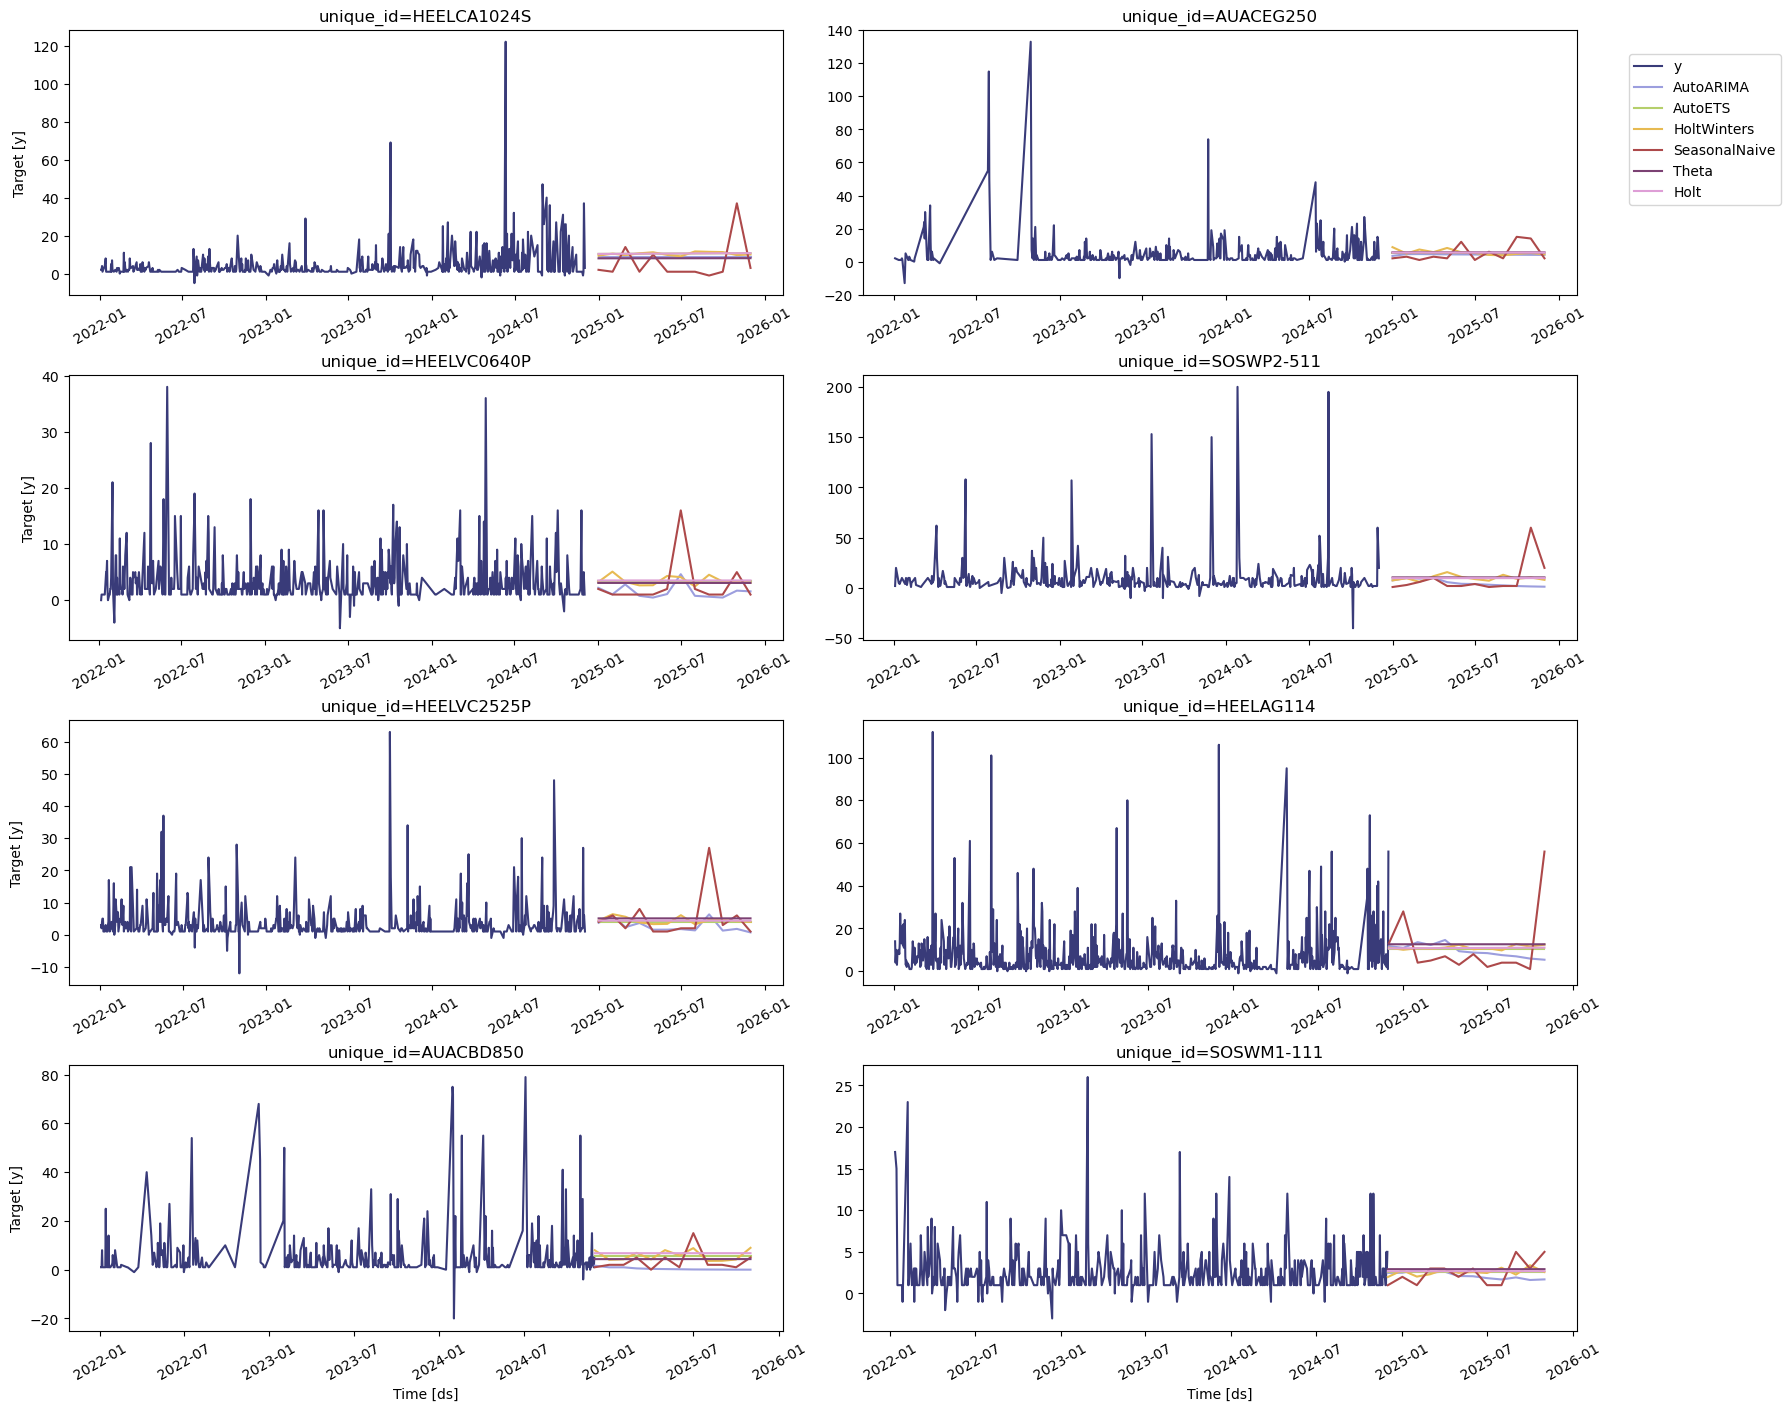

In [43]:
sf.plot(df_m,fcst_df)

In [44]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    col_bm = evaluation_df['best_model'].values[0]
    df = forecasts_df[col_bm] # Wide to long 
    df = df.reset_index(drop=False)
    df.columns = ['unique_id', 'best_model']
    return df

prod_forecasts_df = get_best_model_forecast(forecasts_df = fcst_df, 
                                            evaluation_df = evaluation_df)
prod_forecasts_df

,unique_id,best_model
0,AUACALM4,12.190382
1,AUACALM4,11.281397
2,AUACALM4,13.950425
3,AUACALM4,15.379488
4,AUACALM4,5.948704
...,...,...
691,SOSWSWA153N,4.335119
692,SOSWSWA153N,4.335115
693,SOSWSWA153N,4.335112
694,SOSWSWA153N,4.335109


In [46]:
prod_forecasts_df['best_model'] = prod_forecasts_df['best_model'].round()
prod_forecasts_df.to_excel("../DemandaMediaOutput_01122024.xlsx", sheet_name='PronosticoMensual')